In [116]:
import pandas as pd
from collections import Counter
import math
import seaborn as sns

In [117]:
# read in the data and convert to json
df_art = pd.read_csv('articles.csv').dropna().reset_index(drop=True)
df_art.head()

,title,url,subreddit,text
0,Meta's threat to close down Facebook and Insta...,https://www.cityam.com/metas-threat-to-close-d...,nottheonion,Meta’s threat to close down Facebook and Insta...
1,Pregnant Texas woman driving in HOV lane told ...,https://www.chron.com/news/houston-texas/artic...,nottheonion,Is an unborn fetus a human being in the eyes o...
2,Mark Zuckerberg Says Meta Employees “Lovingly”...,https://consequence.net/2022/04/mark-zuckerber...,nottheonion,Mark Zuckerberg hasn’t always had a squeaky-cl...
3,Police didn't immediately confront the gunman ...,https://www.insider.com/texas-shooting-police-...,nottheonion,Law enforcement is getting slammed for its res...
4,Shaquille O'Neal says gorillas freak out when ...,https://www.insider.com/gorillas-afraid-of-sha...,nottheonion,Shaquille O'Neal says gorillas always freak ou...


In [118]:
stop_file = open("NLTK_English_stopwords.txt", "r")
stop_words = stop_file.read()
stop_words_list = stop_words.replace('\n', ' ').split(" ")
stop_words_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [119]:
import nltk

df_art['text'] = df_art['text'].str.lower()
df_art['text'] = df_art['text'].str.replace('[^\w\s]', '')

for i in range(len(df_art['text'])):
    article = df_art['text'][i]
    if type(article) == float:
        continue
    word_tokens = nltk.word_tokenize(article)
    filtered = []
    for w in word_tokens:
        if w not in stop_words_list:
            filtered.append(w)
    df_art.at[i,'text'] = ' '.join(filtered)

df_art

<ipython-input-119-efeb1fcb5284>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_art['text'] = df_art['text'].str.replace('[^\w\s]', '')


,title,url,subreddit,text
0,Meta's threat to close down Facebook and Insta...,https://www.cityam.com/metas-threat-to-close-d...,nottheonion,metas threat close facebook instagram europe b...
1,Pregnant Texas woman driving in HOV lane told ...,https://www.chron.com/news/houston-texas/artic...,nottheonion,unborn fetus human eyes oftexas traffic laws p...
2,Mark Zuckerberg Says Meta Employees “Lovingly”...,https://consequence.net/2022/04/mark-zuckerber...,nottheonion,mark zuckerberg hasnt always squeakyclean repu...
3,Police didn't immediately confront the gunman ...,https://www.insider.com/texas-shooting-police-...,nottheonion,law enforcement getting slammed response uvald...
4,Shaquille O'Neal says gorillas freak out when ...,https://www.insider.com/gorillas-afraid-of-sha...,nottheonion,shaquille oneal says gorillas always freak nea...
...,...,...,...,...
1683,Elton John Awarded Medal By Joe Biden For Work...,https://www.theonion.com/elton-john-awarded-me...,TheOnion,president biden awarded sir elton john nationa...
1684,What Republicans Are Saying About The Paul Pel...,https://www.theonion.com/what-republicans-are-...,TheOnion,many innocent people die realize words matter ...
1685,What To Say To Someone Struggling With Inflation,https://www.theonion.com/what-to-say-to-someon...,TheOnion,may earn commission links page start slideshow...
1686,Herschel Walker Quietly Asking Around For D.C....,https://www.theonion.com/herschel-walker-quiet...,TheOnion,wrightsville gain display confidence ahead geo...


In [120]:
labels = []
for i in range(1688):
    if i < 844:
        labels.append('TheOnion')
    else:
        labels.append('nottheonion')
        
labels

['TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',
 'TheOnion',

In [121]:
all_word_counts = {}
o_word_counts = {}
not_o_word_counts = {}

for i, r in df_art.iterrows():
    subreddit = r['subreddit']
    text = r['text']
    if type(text) == float:
        continue
    for w in text.split():
        if w not in all_word_counts:
            all_word_counts[w] = 0
        all_word_counts[w] += 1
        
        if subreddit == 'TheOnion':
            if w not in o_word_counts:
                o_word_counts[w] = 0
            o_word_counts[w] += 1
        else:
            if w not in not_o_word_counts:
                not_o_word_counts[w] = 0
            not_o_word_counts[w] += 1

In [122]:
report = []

for w in all_word_counts:
    a = o_word_counts.get(w, 0)
    b = not_o_word_counts.get(w, 0)
    c = sum(o_word_counts.values()) - a
    d = sum(not_o_word_counts.values()) - b
    n = a + b + c + d
    phi = (a*d - b*c) / math.sqrt((a+b)*(c+d)*(a+c)*(b+d))
    
    word_report = {}
    word_report['word'] = w
    word_report['count'] = all_word_counts[w]
    word_report['onion_word_counts'] = o_word_counts.get(w, 0)
    word_report['notonion_word_counts'] = not_o_word_counts.get(w, 0)
    word_report['phi'] = phi
    report.append(word_report)
report

[{'word': 'metas',
  'count': 5,
  'onion_word_counts': 0,
  'notonion_word_counts': 5,
  'phi': -0.0028072880747131634},
 {'word': 'threat',
  'count': 45,
  'onion_word_counts': 9,
  'notonion_word_counts': 36,
  'phi': -0.0033682888622438567},
 {'word': 'close',
  'count': 109,
  'onion_word_counts': 35,
  'notonion_word_counts': 74,
  'phi': -0.00047941040610210723},
 {'word': 'facebook',
  'count': 109,
  'onion_word_counts': 13,
  'notonion_word_counts': 96,
  'phi': -0.008418329860061365},
 {'word': 'instagram',
  'count': 53,
  'onion_word_counts': 4,
  'notonion_word_counts': 49,
  'phi': -0.007070724757959328},
 {'word': 'europe',
  'count': 32,
  'onion_word_counts': 8,
  'notonion_word_counts': 24,
  'phi': -0.0017748549841237373},
 {'word': 'backfires',
  'count': 1,
  'onion_word_counts': 0,
  'notonion_word_counts': 1,
  'phi': -0.001255449476725535},
 {'word': 'eu',
  'count': 28,
  'onion_word_counts': 0,
  'notonion_word_counts': 28,
  'phi': -0.00664349698182546},
 {

In [123]:
df_report = pd.DataFrame(report)
df_sorted = df_report.sort_values(by='count', ascending=False)
df_sorted = df_sorted.head(1000)
df_sorted

,word,count,onion_word_counts,notonion_word_counts,phi
168,said,3902,904,2998,-0.024058
12,would,1400,609,791,0.014367
514,time,1320,833,487,0.040837
306,one,1222,449,773,0.004504
299,people,1165,279,886,-0.012083
...,...,...,...,...,...
1876,adults,59,8,51,-0.005721
1013,banned,59,9,50,-0.005230
6795,watching,59,40,19,0.009974
402,throughout,59,29,30,0.004579


In [124]:
df_sorted = df_sorted.sort_values(by='phi', ascending=False)
df_sorted

,word,count,onion_word_counts,notonion_word_counts,phi
2252,press,617,528,89,0.048933
27069,slides,339,339,0,0.046264
20923,slide,344,341,3,0.045995
94,reportedly,471,410,61,0.043949
453,advertisement,593,465,128,0.041395
...,...,...,...,...,...
360,state,714,91,623,-0.020742
130,according,614,63,551,-0.021553
661,says,343,8,335,-0.021636
168,said,3902,904,2998,-0.024058


In [125]:
top_onion_words = df_sorted[df_sorted['onion_word_counts'] > 10].head(10)['word'].values.tolist()
top_notonion_words = df_sorted[df_sorted['notonion_word_counts'] > 10].head(10)['word'].values.tolist()

print(df_sorted)
print('10 words most closely correlated with onion: ', top_onion_words)
print('10 words most closely correlated with notonion: ', top_notonion_words)

                word  count  onion_word_counts  notonion_word_counts       phi
2252           press    617                528                    89  0.048933
27069         slides    339                339                     0  0.046264
20923          slide    344                341                     3  0.045995
94        reportedly    471                410                    61  0.043949
453    advertisement    593                465                   128  0.041395
...              ...    ...                ...                   ...       ...
360            state    714                 91                   623 -0.020742
130        according    614                 63                   551 -0.021553
661             says    343                  8                   335 -0.021636
168             said   3902                904                  2998 -0.024058
232           police    857                 84                   773 -0.025979

[1000 rows x 5 columns]
10 words most closely corre

In [126]:
def predict_speaker(article):
    '''
    Implement naive bayes to predict the speaker for a given article
    '''
    total = df_sorted['count'].sum()
    onion_prior = df_sorted['onion_word_counts'].sum() / total
    notonion_prior = df_sorted['notonion_word_counts'].sum() / total
    
    article = article.lower()
    article = article.replace('[^\w\s]', '')
    word_tokens = nltk.word_tokenize(article)
    filtered = []
    for w in word_tokens:
        if w not in stop_words_list:
            filtered.append(w)
    word_tokens = filtered
    
    onion_prob = 1
    notonion_prob = 1
    for w in word_tokens:
        if w in df_sorted['word'].values.tolist():
            onion_count = df_sorted.loc[df_sorted['word']==w]['onion_word_counts'].values[0]
            notonion_count = df_sorted.loc[df_sorted['word']==w]['notonion_word_counts'].values[0]
            onion_prob = onion_prob * ((onion_count + 1) / onion_prior)
            notonion_prob = notonion_prob * ((notonion_count + 1) / notonion_prior)
            
    onion_post = onion_prior * onion_prob
    notonion_post = notonion_prior * notonion_prob
    
    return math.log(onion_post), math.log(notonion_post)

In [127]:
score_diffs = []
for article in df_art['text'].values.tolist():
    if type(article) == float:
        continue
    onion,notonion = predict_speaker(article)
    score_diffs.append(notonion - onion)

<ipython-input-126-553d33205704>:25: RuntimeWarning: overflow encountered in scalar multiply
  notonion_prob = notonion_prob * ((notonion_count + 1) / notonion_prior)
<ipython-input-126-553d33205704>:24: RuntimeWarning: overflow encountered in scalar multiply
  onion_prob = onion_prob * ((onion_count + 1) / onion_prior)


In [128]:
tp = 0 
tn = 0 
fp = 0 
fn = 0

for score_diff, label in zip(score_diffs, labels):
    label_pred = score_diff > 0
    
    if label == 'nottheonion' and label_pred:
        tp += 1
    elif label == 'TheOnion' and not label_pred:
        tn += 1
    elif label == 'TheOnion' and label_pred:
        fp += 1
    elif label == 'nottheonion' and not label_pred:
        fn += 1

accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print('Accuracy:', accuracy)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Precision:', precision)
print('f1-score:', f1)

Accuracy: 0.2968009478672986
Sensitivity: 0.0995260663507109
Specificity: 0.4940758293838863
Precision: 0.1643835616438356
f1-score: 0.12398523985239851


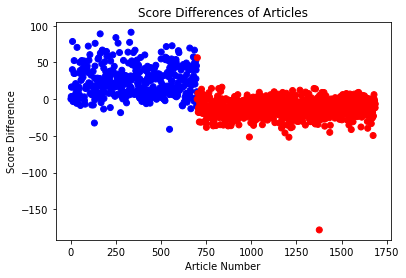

In [131]:
import matplotlib.pyplot as plt

plt.xlabel('Article Number')
plt.ylabel('Score Difference')
plt.title('Score Differences of Articles')
colors = []
for i in range(1688):
    if i < 700:
        colors.append('blue')
    else:
        colors.append('red')
        
plt.scatter(range(len(df_art['text'].values.tolist())), score_diffs, c=colors)
plt.show()